In [15]:
import networkx as nx
import wandb

import color_utils
from data_generation.motifs import SparseGraph, CircleMotif, FullyConnectedMotif
from color_utils import ColorUtils
from typing import Optional
from matplotlib import pyplot as plt
import torch
import torch_geometric
from torch_geometric.data import Data
import numpy as np
from analyzer import Analyzer
import seaborn as sns
self = Analyzer("p27xu96k", resume_last=True, device="cpu", batch_size=6000) # If resume_last False, use BEST checkpoint instead"
# hierarchical: dffrco9s
# mutag: 1jjqtth1
# BBBP: p27xu96k
# redditbin:
# mutag seq: xmi96d32
# expressvity 1z19grgs
POOL_STEP = 1
NAME = "BBBP" #tt: train_test
# mutag hyperplane: wrxfkzt0
# first that worked well: vm2opsxh

Default number of threads: 14, using 14!


C:\Users\jonas\OneDrive\Dokumente\Studium\Master\Project\MPhilThesis\train.py:362: UserWarning: Warning: resuming a training run is equivalent to continuing the same run in expectation but may  not give the same result deterministically due to the reset of the random seed.
  warnings.warn("Warning: resuming a training run is equivalent to continuing the same run in expectation but"
0it [00:00, ?it/s]
C:\Users\jonas\OneDrive\Dokumente\Studium\Master\Project\MPhilThesis\analyzer.py:65: UserWarning: Overwriting the batch size can have a significant impact on the clustering and therefore the inference behaviour!
  warnings.warn("Overwriting the batch size can have a significant impact on the clustering and therefore "


In [16]:
data_loader = self.train_loader.__class__(self.train_loader.dataset +
                                                      self.test_loader.dataset,
                                                      self.train_loader.batch_size)

all_data = self.load_required_data(data_loader, 1, "joint train and test",
                                     ["x", "target", "info_pooling_assignments"])

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

Loaded 1836 joint train and test samples. Accuracy 91.34%


In [20]:
torch.max(all_data["info_pooling_assignments"][0])

tensor(8)

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Loaded 1836 train and test samples. Accuracy 91.45%


100%|██████████| 205/205 [00:00<00:00, 240.82it/s]


tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        37.]) tensor(3.4000)


<Figure size 640x480 with 0 Axes>

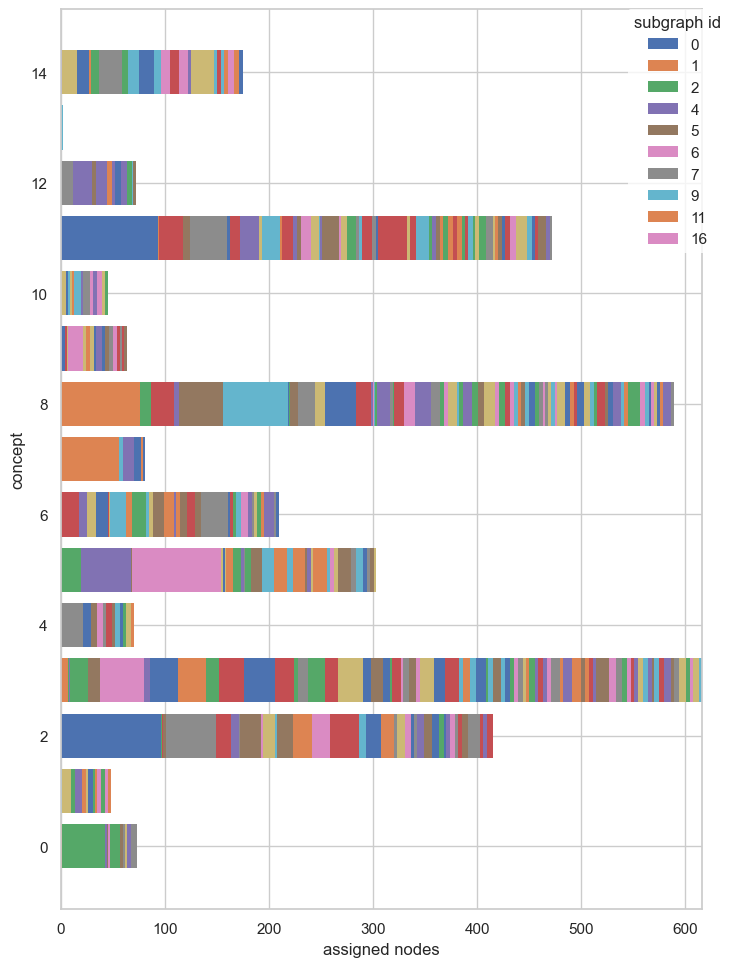

In [17]:
import matplotlib

p_general = {
        "font.family": "STIXGeneral", #"Computer Modern",  # "STIXGeneral",  # Nice alternative font.
        # "font.family": "serif",
        # "font.serif": [],
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
        # Set the font for maths
        "mathtext.fontset": "cm",
        # "font.sans-serif": ["DejaVu Sans"],  # gets rid of error messages
        # "font.monospace": [],
        "lines.linewidth": 1.5,
        "scatter.marker": "+",
        "image.cmap": "RdYlBu_r",
        "text.usetex": False,
    }

sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : True})
sns.color_palette("tab20")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.despine()
#matplotlib.rcParams.update(p_general)

# TODO inference_with_train before annotation

subgraphs, purities = self.count_subgraphs(pool_step=POOL_STEP, load_part=1, use_k_hop=False, inference_with_train=True, use_only_test = True, plot_num_subgraphs=False, plot_num_nodes=True, save_path=f"img/qualitative/counts_{NAME}_{POOL_STEP}.svg", max_neighborhoods_to_store=10, min_occs_to_store=0, horizontal=True)
print(purities, torch.mean(purities))

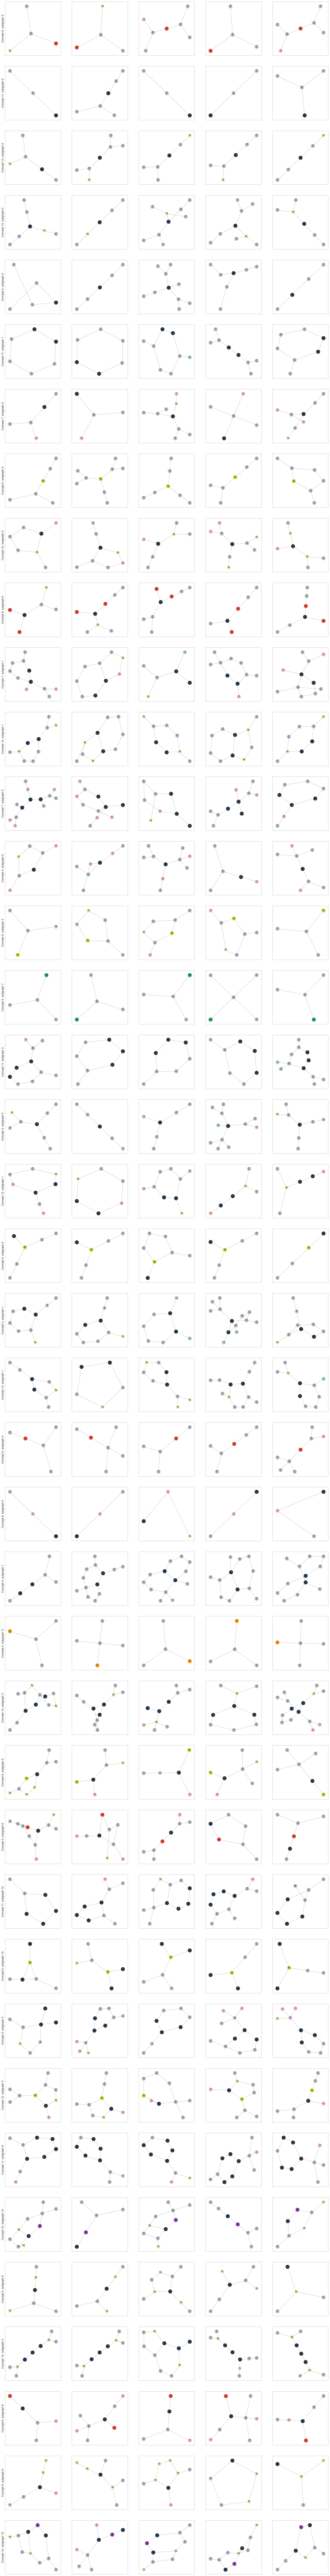

In [13]:
sns.set_style("whitegrid", {'axes.grid' : False})
self.plot_extended_concept_examples(subgraphs, POOL_STEP, filter_subgraphs=None, samples_per_concept=5, save_path=f"img/qualitative/subgraphs_{NAME}_{POOL_STEP}.svg", num_concepts=40)

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::bincount. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at ..\aten\src\ATen\functorch\BatchedFallback.cpp:84.)
  batched_outputs = func(*batched_inputs, **kwargs)
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::bincount. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at ..\aten\src\ATen\functorch\BatchedFallback.cpp:84.)
  batched_outputs = func(*batched_inputs, **kwargs)
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: Th

Loaded 2304 joint train and test samples. Accuracy 100.00%
46.88%+-nan
85.55%+-nan
85.55%+-nan


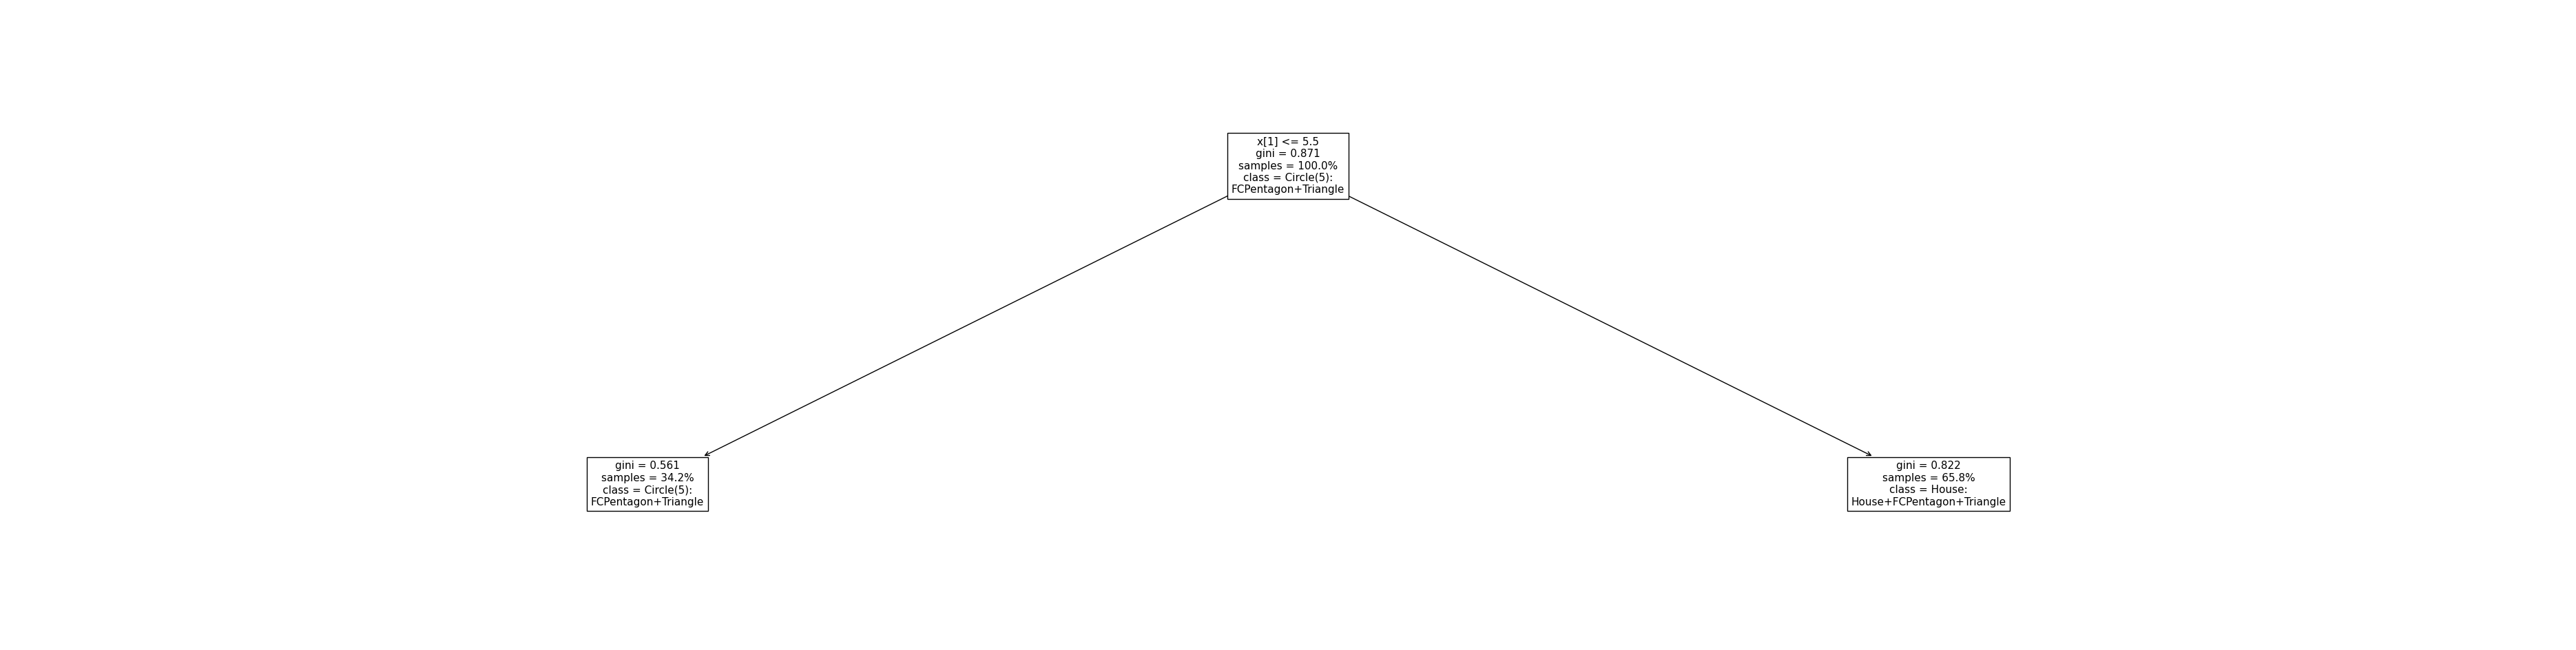

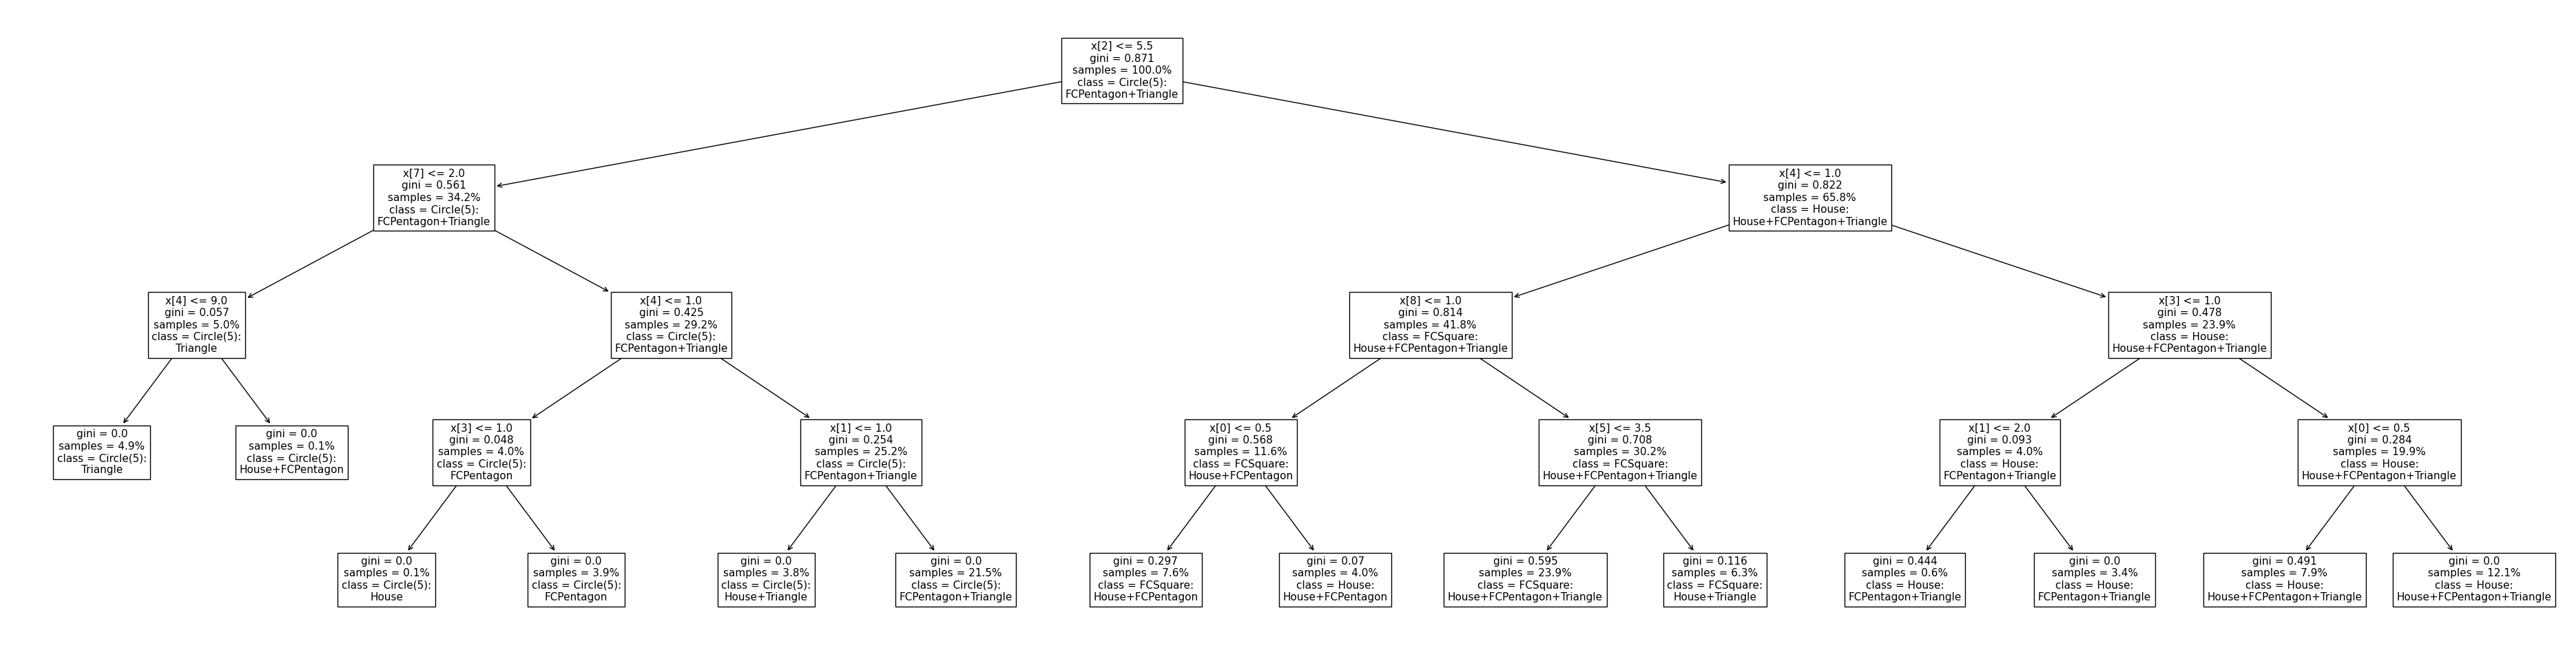

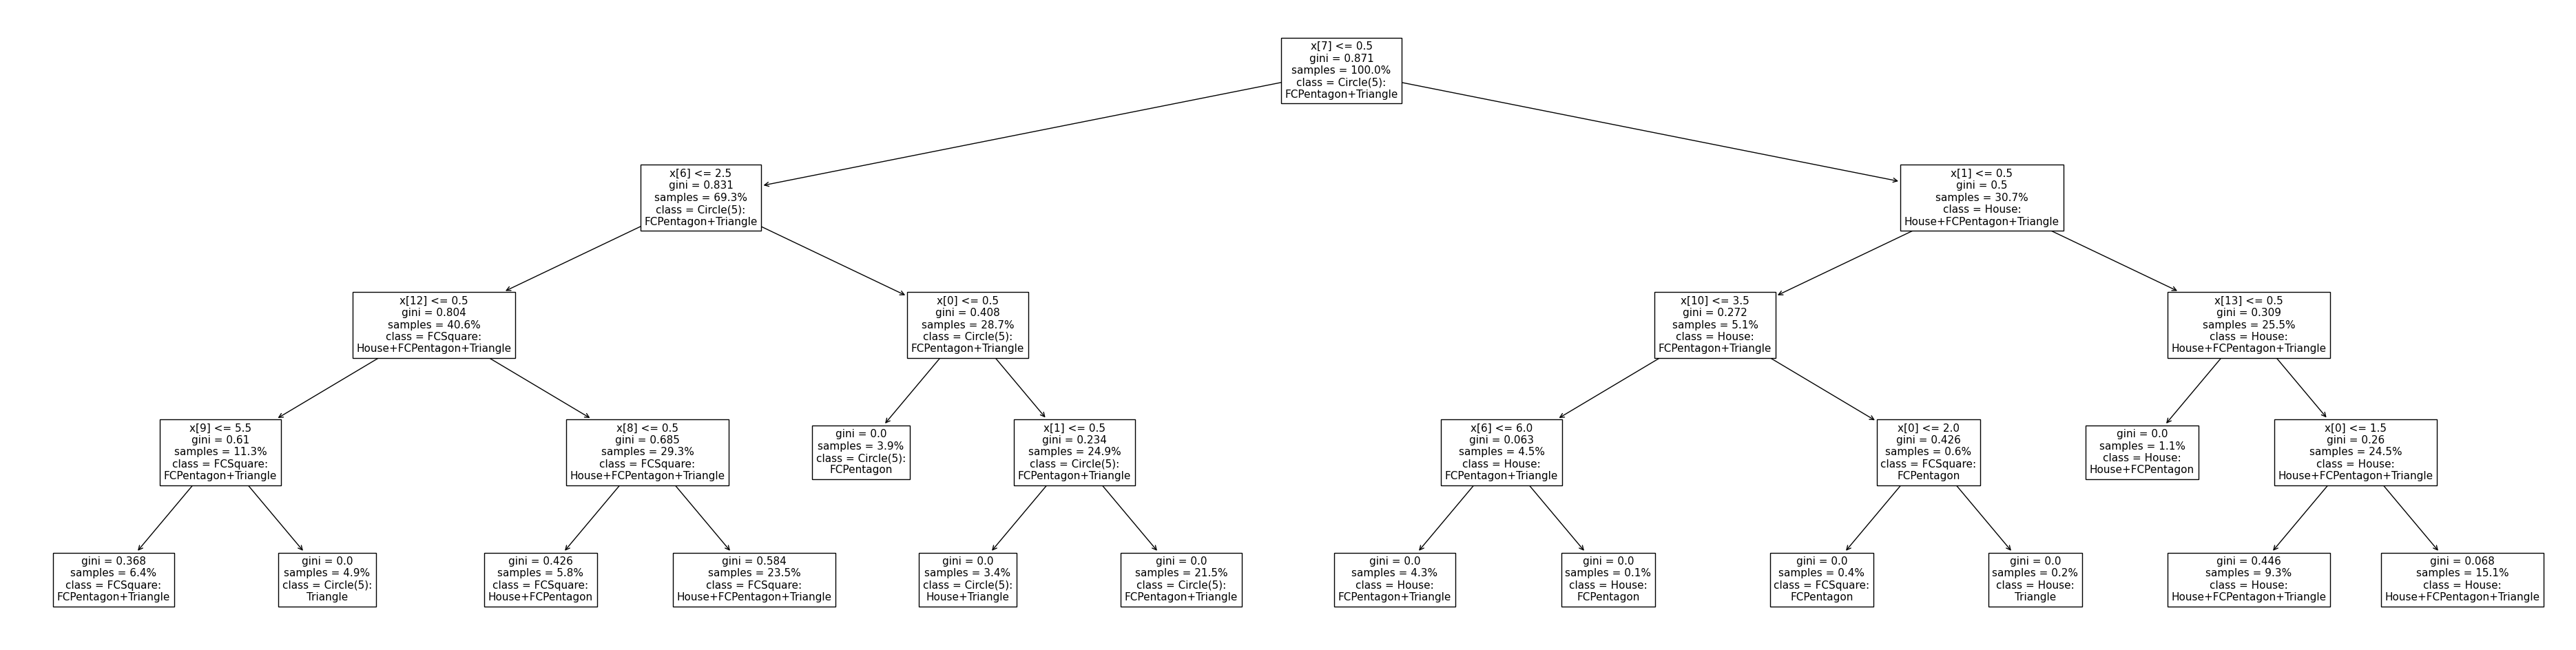

tensor([[0.4688, 0.8555, 0.8555]], dtype=torch.float64)

In [4]:
import seaborn as sns
sns.reset_orig()
# TODO when putting this in the appendix, highlight the path I describe, rotate by 90 degrees and give the accuracy of the decision tree, mentioning max depth 4, also mention class format: <highlevel motif>:lowlevel motifs
self.calculate_concept_completeness(seeds=[1], plot_tree=True, max_depth=4, save_path=f"img/qualitative/decision_tree_{NAME}")

In [22]:
wandb_completeness_dict = {
    # "hierarch_kmeans": ["dffrco9s", "u01pnnwy", "fzs84cpe"],
    # "hierarch_diff_pool": ["xwfx78d4", "xzi0j0mz", "v50dlhxd"],
    # "hierarch_hyperplane": ["zmx5fvmn", "koh410t4", "9sysn79k"],
    # #
    # "mutag_softsampling": ["v4uys5yi", "u3os264c", "in12314m"],
    # "mutag_sequential": ["xmi96d32", "s2rydeys", "biaraap6"],
    # "mutag_global": ["0lyqmh03", "qwj1dy75", "3ud1u4po"],
    # "mutag_diffpool": ["akkj2suh", "syayr4p2", "1kb6y579"],
    # "mutag_hyperplane": ["wrxfkzt0", "u316cqlr", "6wmf41pm"],
    # "mutag_kmeans": ["1jjqtth1", "zc9fwdzl", "lv73y6he"],

    "redditbin_kmeans": ["tckckifo", "djdnwzwt", "8ks4yr9x"],

    # "BBBP_kmeans": ["p27xu96k", "c8gn54qn", "8uz38reg"],
    # "BBBP_hyperplane": ["r6t6we3a", "85zov3xy", "ywajgrya"],
    # #
    # "express_kmeans": ["1z19grgs", "3svdj8x5", "mmvdbdqz"],
}

wandb_others_dict = {
    "hierarch_gcn": ["k5mugtiu", "cljvn0x7", "4z8hbyve"],
    "hierarch_asap": ["zwh2jxji", "9ot17dgl", "tfc6bhvu"],

    "BBBP_gcn": ["ppckslwg", "qxqg1tux", "l0nuv1cr"],
}

In [7]:
import os
import sys
import warnings
from typing import List
from analyzer import Analyzer
import torch

def overall_completeness(wandb_runs: List[str], seeds=[1, 2, 3], **kwargs):
    results = None
    for run_id in wandb_runs:
        # sys.stdout = open(os.devnull, 'w')
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            analyzer = Analyzer(run_id, **kwargs)
            res = analyzer.calculate_concept_completeness(seeds=seeds, data_part=1, verbose=False, plot_tree=False)
        if results is None:
            results = res
        else:
            results = torch.cat((results, res), dim=0)
        # sys.stdout = sys.__stdout__
    stds, means = torch.std_mean(results, dim=0)
    print(" & ".join([f"{100*means[i]:.1f}\%$\\pm${100*stds[i]:.1f}" for i in range(stds.shape[0])]))
    return results


for k, v in wandb_completeness_dict.items():
    print(k)
    overall_completeness(v, resume_last=True, device="cpu", batch_size=6000)

NameError: name 'wandb_completeness_dict' is not defined

In [23]:
import warnings
from typing import List
from analyzer import Analyzer
import torch

def overall_purity(wandb_runs: List[str], num_pool_steps: int = 2, **kwargs):
    results = torch.zeros(len(wandb_runs), num_pool_steps * 2)
    general_kwargs = dict(load_part=0.25, inference_with_train=False, max_neighborhoods_to_store=0, min_occs_to_store=100, horizontal=True, plot_num_subgraphs=False, plot_num_nodes=False)
    for i, run_id in enumerate(wandb_runs):
        # sys.stdout = open(os.devnull, 'w')
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            analyzer = Analyzer(run_id, **kwargs)
            for pool_step in range(num_pool_steps):
                _, purities = analyzer.count_subgraphs(pool_step=pool_step, **general_kwargs, use_k_hop=False)
                results[i, pool_step * 2] = torch.mean(purities)
                # _, purities = analyzer.count_subgraphs(pool_step=pool_step, **general_kwargs, use_k_hop=True)
                # results[i, pool_step * 2 + 1] = torch.mean(purities)
        # sys.stdout = sys.__stdout__
    stds, means = torch.std_mean(results, dim=0)
    return " & ".join([f"{100*means[i]:.1f}\%$\\pm${100*stds[i]:.1f}" for i in range(stds.shape[0])])

all_res = []
for k, v in wandb_completeness_dict.items():
    res_str = k + ": " + overall_purity(v, resume_last=True, device="cpu", batch_size=6000, num_pool_steps=1)
    print(res_str)
    all_res.append(res_str)

for res in all_res:
    print(res)

Default number of threads: 14, using 14!


0it [00:00, ?it/s]


NOT remapping assignments between batches!


100%|██████████| 1/1 [00:52<00:00, 52.21s/it]


Loaded 50 test samples. Accuracy 92.00%


100%|██████████| 50/50 [17:00<00:00, 20.41s/it] 


Default number of threads: 14, using 14!


0it [00:00, ?it/s]


NOT remapping assignments between batches!


100%|██████████| 1/1 [00:53<00:00, 53.11s/it]


Loaded 50 test samples. Accuracy 94.00%


100%|██████████| 50/50 [16:46<00:00, 20.12s/it] 


Default number of threads: 14, using 14!


0it [00:00, ?it/s]


NOT remapping assignments between batches!


100%|██████████| 1/1 [00:19<00:00, 19.31s/it]


Loaded 50 test samples. Accuracy 88.00%


100%|██████████| 50/50 [03:56<00:00,  4.72s/it]

redditbin_kmeans: 12281.9\%$\pm$19529.0 & 0.0\%$\pm$0.0
redditbin_kmeans: 12281.9\%$\pm$19529.0 & 0.0\%$\pm$0.0


In [13]:
torch.zeros(1, dtype=torch.int)

tensor([0], dtype=torch.int32)

In [1]:
node_table, edge_table = self.log_graphs(10)
self.plot_wandb_tables(node_table, edge_table, 0, 2)

NameError: name 'self' is not defined

In [ ]:


###### MUTAG
NO2 = SparseGraph(torch.tensor([3, 1, 1], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
FO2 = SparseGraph(torch.tensor([5, 1, 1], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
SO2 = SparseGraph(torch.tensor([7, 1, 1], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
carbon_ring = CircleMotif(6, [0], 1).sample()
# TODO also 2/3 merged rings. Add option to search for multiple motifs together. Actually, this could give a really nice, final joint chart with all the important motifs and how they are distributed


In [ ]:
### BBBP
atom_names = ['H', 'B', 'C', 'N', 'O', 'F', 'Na', 'P', 'S', 'Cl', 'Ca', 'Br', 'I']

NO2 = SparseGraph(torch.tensor([3, 4, 4], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
FO2 = SparseGraph(torch.tensor([5, 4, 4], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
SO2 = SparseGraph(torch.tensor([8, 4, 4], dtype=torch.long),
                  torch.tensor([[0, 1, 0, 2],
                                [1, 0, 2, 0]], dtype=torch.long))
carbon_ring = CircleMotif(6, [2], 3).sample()
carbon_ring.x = torch.argmax(carbon_ring.x, dim=-1)

In [ ]:
FC4 = FullyConnectedMotif(4, [0], 1).sample()
FC4.x = torch.argmax(FC4.x, dim=-1)

In [ ]:




#
# find_subgraph(self, FC4.edge_index, FC4.x.squeeze(-1), pool_step=0, load_part=1)

In [ ]:
torch.as_tensor(torch.tensor(4))

In [ ]:
def one_hot(indices: int | torch.Tensor, num_classes: Optional[int] = None, **kwargs):
    indices = torch.as_tensor(indices)
    assert indices.ndim <= 1 # Otherwise would need to deal with arange over arbitrary number of dimensions
    if num_classes is None:
        num_classes = torch.max(indices) + 1
    res = torch.zeros(indices.shape + (num_classes, ), **kwargs)
    if indices.ndim == 0:
        res[indices] = 1
    else:
        res[torch.arange(indices.shape[0]), indices] = 1
    return res

one_hot(2, 10)

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Loaded 256 test samples. Accuracy 100.00%


100%|██████████| 256/256 [00:02<00:00, 113.95it/s]


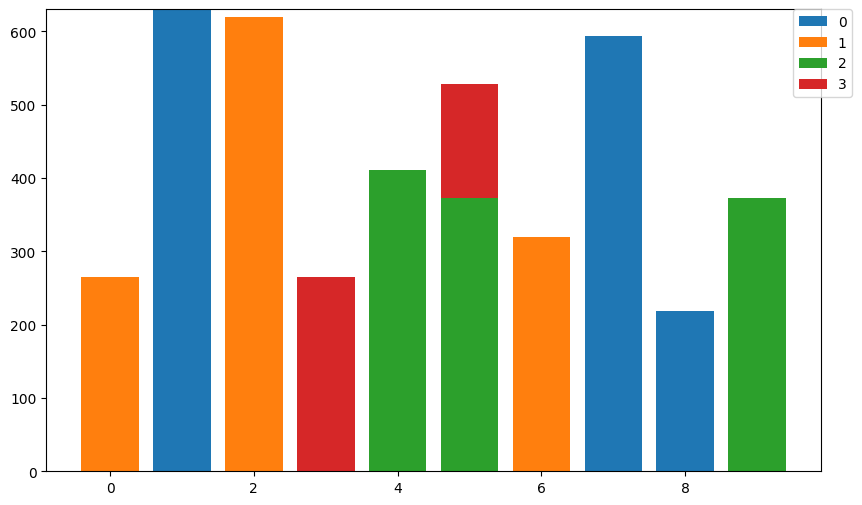

In [2]:
from tqdm import tqdm
from graphutils import adj_to_edge_index
from torch_geometric.utils import to_networkx, k_hop_subgraph
from torch_geometric.utils import to_networkx, k_hop_subgraph
import networkx.algorithms.isomorphism as iso
from graphutils import one_hot





subgraphs = self.count_subgraphs(pool_step=0, load_part=1, use_k_hop=False, inference_with_train=False)

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Loaded 256 test samples. Accuracy 100.00%


100%|██████████| 256/256 [00:03<00:00, 79.30it/s]


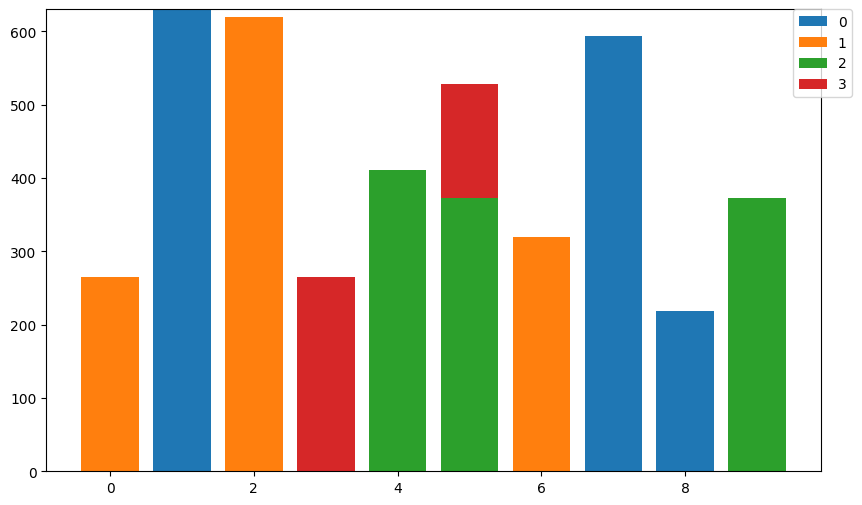

In [2]:
subgraphs2 = self.count_subgraphs(pool_step=0, load_part=1, use_k_hop=False)

In [ ]:
graph = list(buckets['bcb666336cd11cfe336b4f388b7d82e1'].keys())[0]
concepts_dict = nx.get_node_attributes(graph, "concept")
concepts = torch.tensor(len(c))

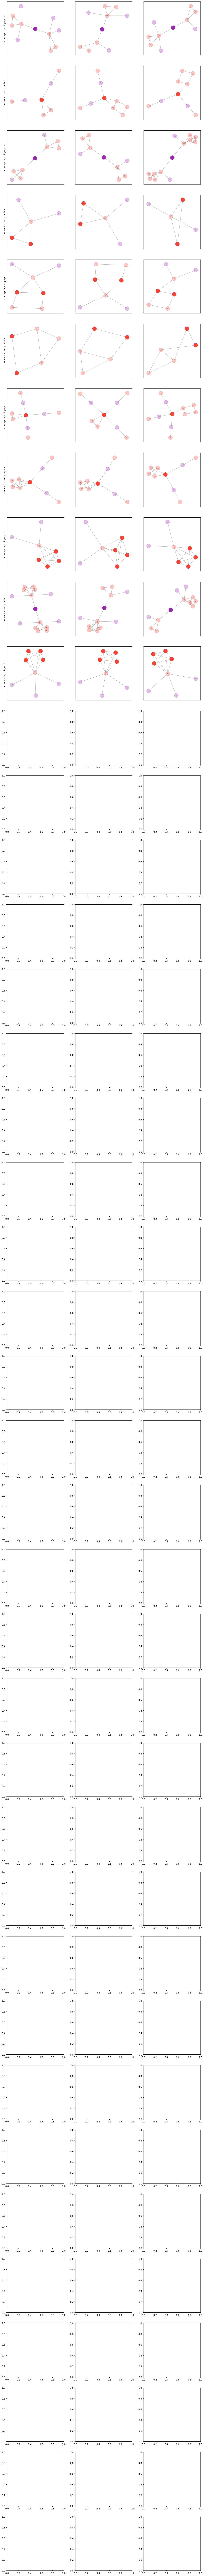

In [4]:
from typing import List, Tuple


self.plot_extended_concept_examples(subgraphs2, 0, filter_subgraphs=None)

In [ ]:
1jjqtth1

NOT remapping assignments between batches!


100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::bincount. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at ..\aten\src\ATen\functorch\BatchedFallback.cpp:84.)
  batched_outputs = func(*batched_inputs, **kwargs)
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::bincount. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at ..\aten\src\ATen\functorch\BatchedFallback.cpp:84.)
  batched_outputs = func(*batched_inputs, **kwargs)
C:\Users\jonas\anaconda3\envs\HierarchicalClusters\lib\site-packages\functorch\_src\vmap.py:489: UserWarning: Th

Loaded 2304 joint train and test samples. Accuracy 100.00%
46.88%+-nan
93.36%+-nan
86.72%+-nan


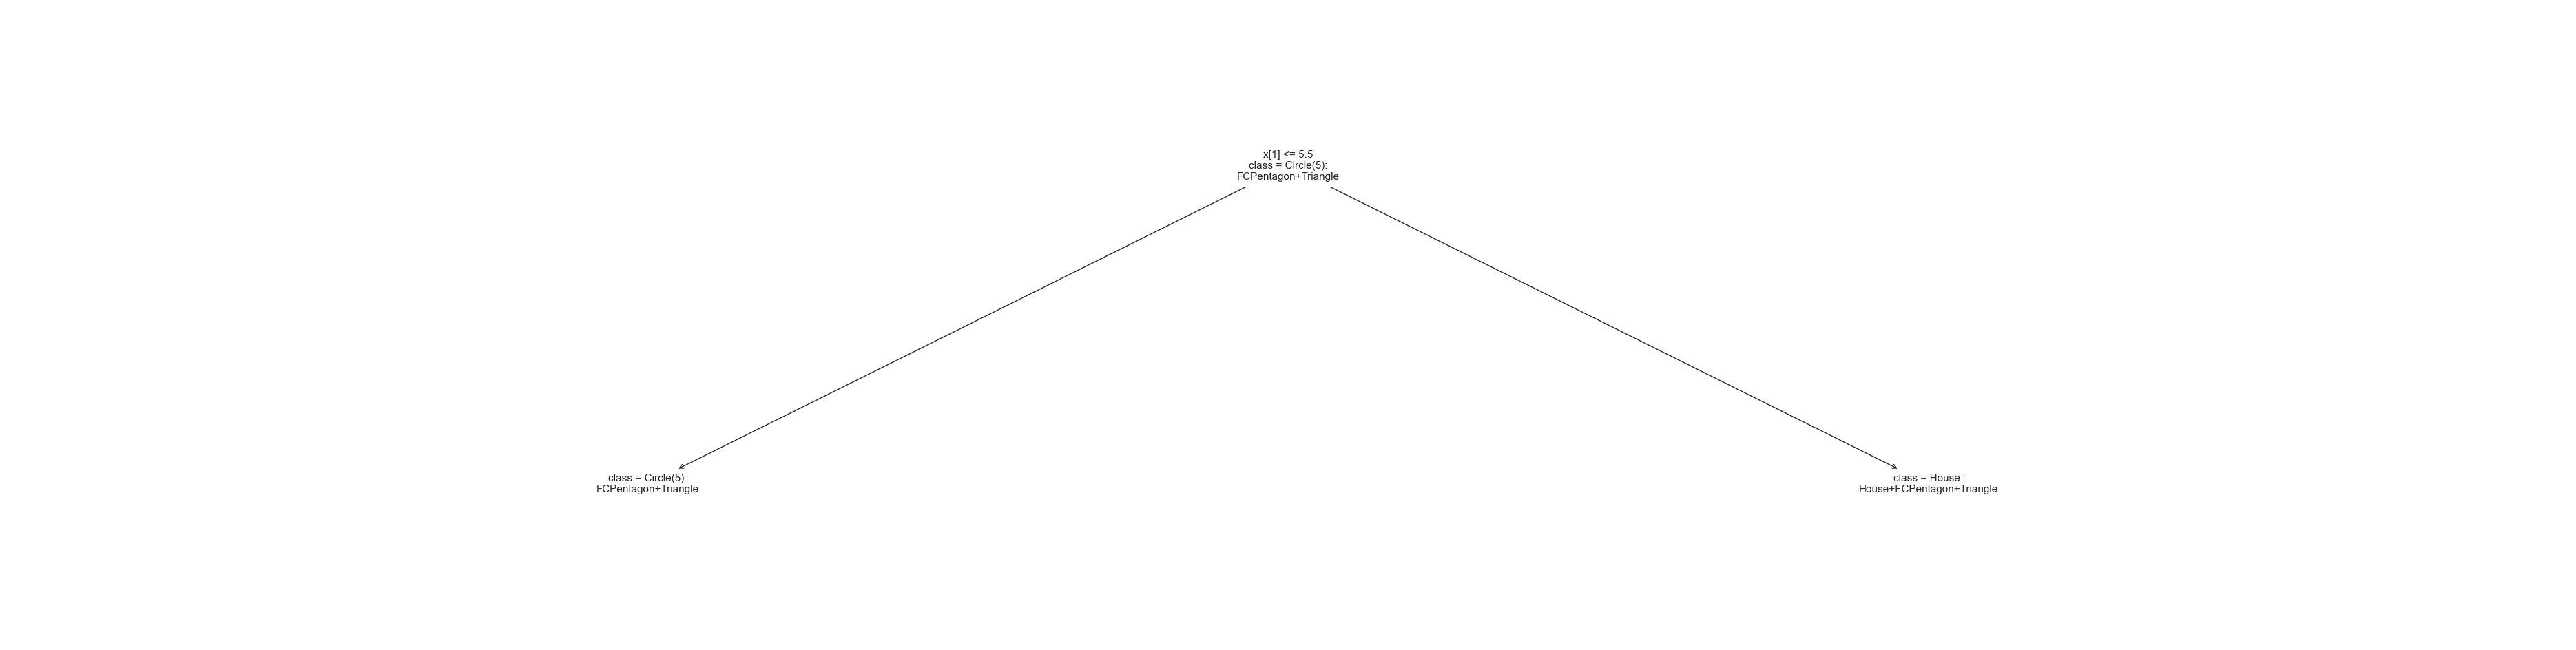

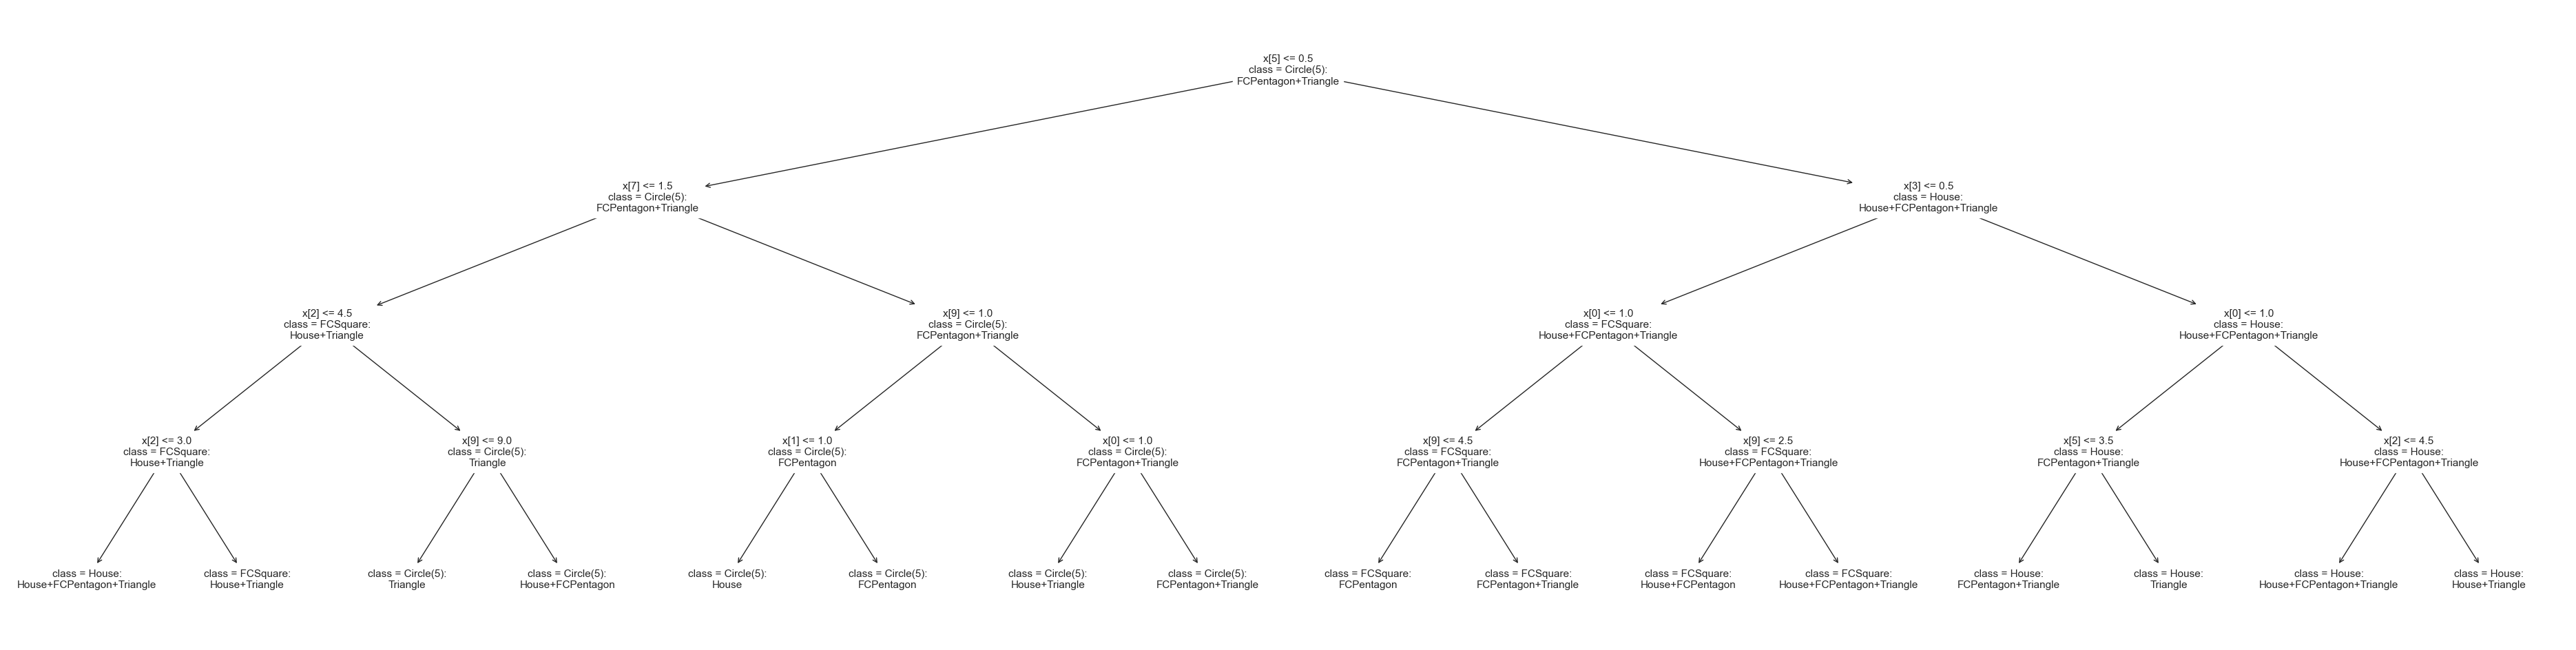

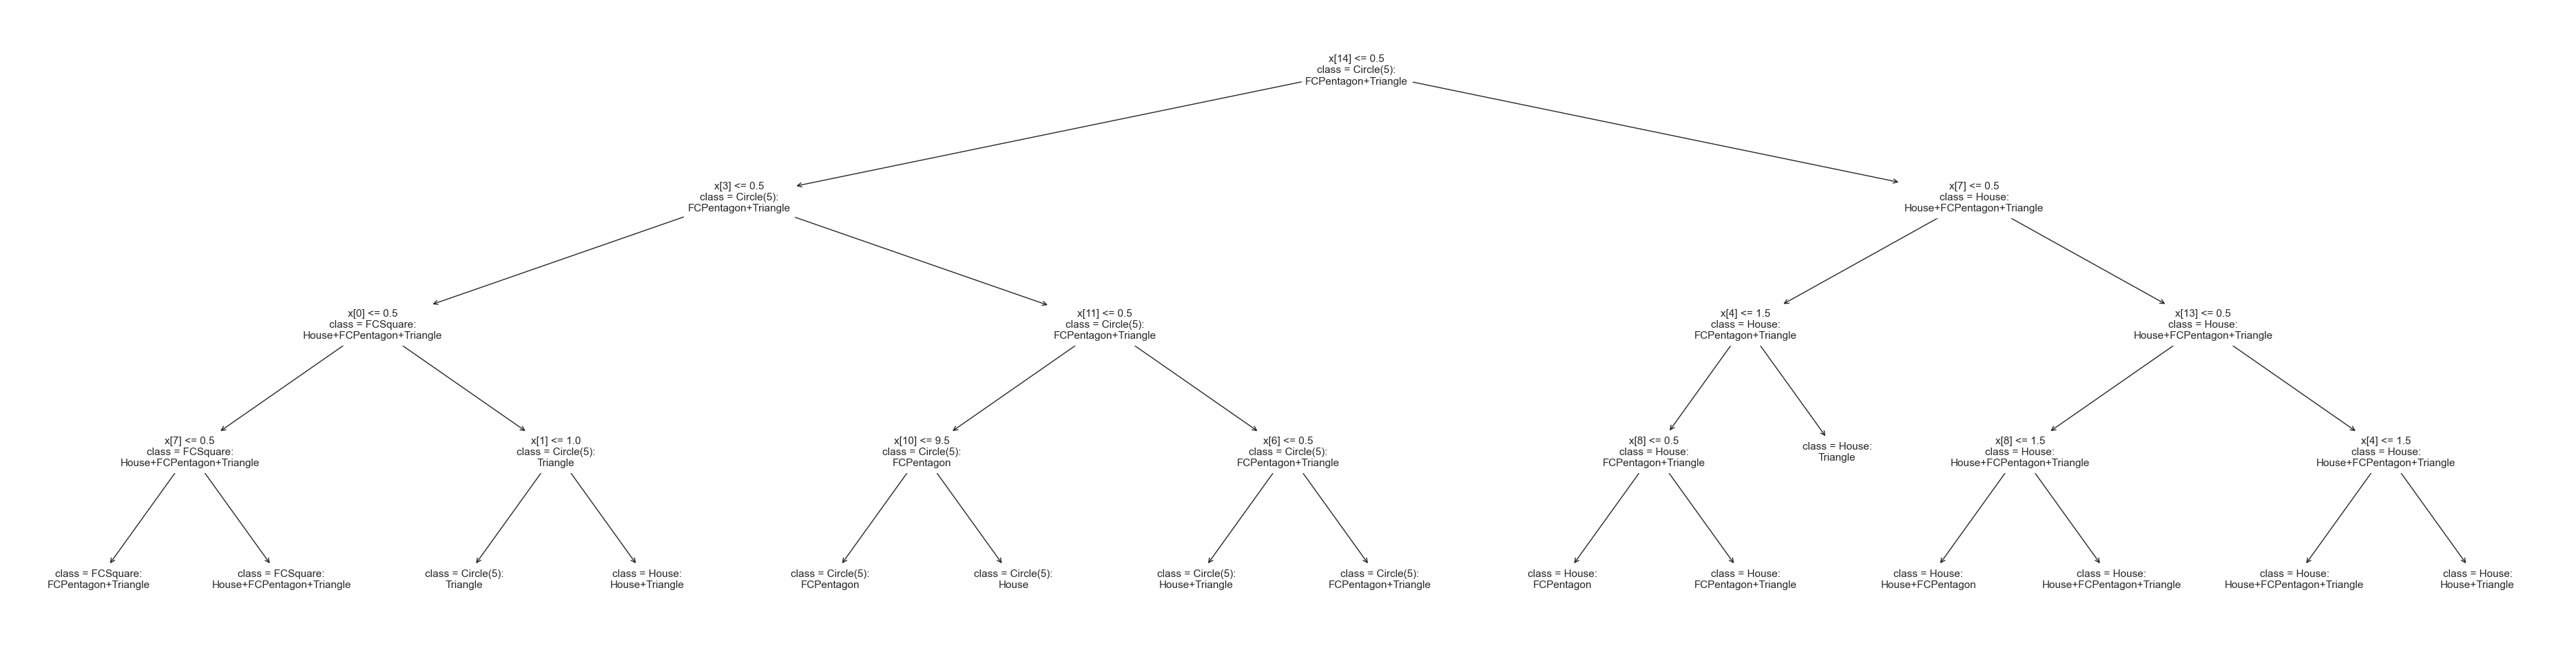

tensor([[0.4688, 0.9336, 0.8672]], dtype=torch.float64)

In [8]:
from networkx import weisfeiler_lehman_graph_hash
from data_generation.motifs import SplitHexagon
from torch_geometric.utils import to_networkx

# WL distinguishability of the 2 graphs
g1 = SplitHexagon([0], 1).sample()
g1 = to_networkx(Data(edge_index=g1.edge_index, num_nodes=g1.num_nodes()), to_undirected=True)
g2 = SplitHexagon([0], 1).sample()
g2 = to_networkx(Data(edge_index=g2.edge_index, num_nodes=g2.num_nodes()), to_undirected=True)
h1 = weisfeiler_lehman_graph_hash(g1, digest_size=64, iterations=50)
h2 = weisfeiler_lehman_graph_hash(g1, digest_size=64, iterations=50)
print(h1)
print(h2)

a5adbda0c1a794923da595944e95ba9ec2cadc851176f599d39c0cf5eda5d5648be70320e9b921383878a700420dbc9587ac893bc9d8230f835622d141deee0f
a5adbda0c1a794923da595944e95ba9ec2cadc851176f599d39c0cf5eda5d5648be70320e9b921383878a700420dbc9587ac893bc9d8230f835622d141deee0f


NOT remapping assignments between batches!


100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


Loaded 43 test samples. Accuracy 76.74%
60 18 1665


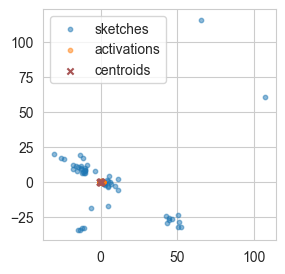

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
test_data = self.load_required_data(self.test_loader, 0.1, "test", ["info_pooling_activations", "mask"])
activations = test_data["info_pooling_activations"][0][test_data["mask"]]
cluster_alg = self.model.graph_network.pool_blocks[0].cluster_alg
all_points = torch.cat((cluster_alg.sketches, cluster_alg.centroids, activations), dim=0)
coords = PCA(n_components=2).fit_transform(all_points)
end_sketches = cluster_alg.sketches.shape[0]
end_centroids = cluster_alg.centroids.shape[0] + end_sketches

print(cluster_alg.sketches.shape[0], cluster_alg.centroids.shape[0], activations.shape[0])
sns.color_palette()
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(coords[:end_sketches, 0], coords[:end_sketches, 1], label="sketches", alpha=0.5, s=10)
ax.scatter(coords[end_centroids:, 0], coords[end_centroids:, 1], label="activations", alpha=0.5, s=10)
ax.scatter(coords[end_sketches:end_centroids, 0], coords[end_sketches:end_centroids, 1], label="centroids", alpha=1, s=20, marker="x", c="#A85555")
ax.legend()

fig.savefig("img/sequential_embeddings.pdf", bbox_inches="tight")

In [55]:
import pandas as pd
import numpy as np


df = pd.DataFrame(np.array([
                       [99.9, 0.2, "Synthetic\nHierarchical", "Ours"],
                       [100, 0, "Synthetic\nHierarchical", "Standard GNN"],
                       [100, 0, "Synthetic\nHierarchical", "DiffPool"],
                       [96.9, 4.8, "Synthetic\nHierarchical", "ASAP"],

                       [77.0, 2.3, "Mutagenicity", "Ours"],
                       [80.5, 0.7, "Mutagenicity", "Standard GNN"],
                       [78.7, 0.6, "Mutagenicity", "DiffPool"],
                       [76.2, 1.7, "Mutagenicity", "ASAP"],

                       [85, 1.6, "BBBP", "Ours"],
                       [84.9, 3.1, "BBBP", "Standard GNN"],

                       [88.7, 2.2, "REDDIT-\nBINARY", "Ours"],
                       [89.1, 0.9, "REDDIT-\nBINARY", "Standard GNN"],

                       [100, 0, "Synthetic\nExpressivity", "Ours"],
                       [53.5, 0, "Synthetic\nExpressivity", "Standard GNN"]

                       ]), columns=['acc', 'std', 'dataset', 'method'])

df["acc"] = pd.to_numeric(df["acc"])
df["std"] = pd.to_numeric(df["std"])
df["dataset"] = pd.Categorical(df["dataset"], ["Synthetic\nHierarchical", "Mutagenicity", "BBBP", "REDDIT-\nBINARY", "Synthetic\nExpressivity"]) # for ordering
df["method"] = pd.Categorical(df["method"], ["Ours", "Standard GNN", "DiffPool", "ASAP"]) # for ordering

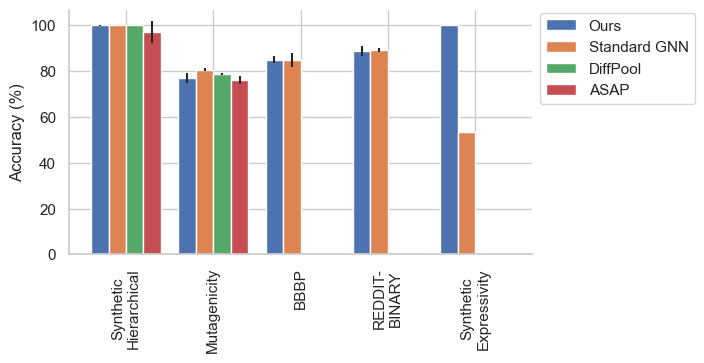

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : True})
sns.color_palette("tab20")
#sns.despine()

def errplot(x, y, yerr, hue, **kwargs):
    data = kwargs.pop('data')
    p = data.pivot_table(index=x, columns=hue, values=y, aggfunc='mean')
    err = data.pivot_table(index=x, columns=hue, values=yerr, aggfunc='mean')
    p.plot(kind='bar', yerr=err, ax=plt.gca(), **kwargs)

#fig, ax = plt.subplots()
# grid = sns.catplot(
#     data=accuracies, kind="bar",
#     x="dataset", y="acc", hue="method",
#     errorbar="sd", alpha=1, height=3, aspect=2,
# )
grid = sns.FacetGrid(df, height=4, aspect=1.5)
grid.map_dataframe(errplot, "dataset", "acc", "std", "method", color=sns.color_palette("deep").as_hex(), width=0.8)

grid.set(xlabel='', ylabel='Accuracy (%)')
plt.subplots_adjust(right=0.90)
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
#ax.bar(x_pos, CTEs, yerr=error, align='center')#, alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
# # ax.set_xticks(x_pos)
# # ax.set_xticklabels(materials)
# ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
# plt.show()
grid.fig.savefig("img/accuracies.svg", bbox_inches="tight")

In [47]:
sns.color_palette("deep").as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [44]:
pallete[:4]

'#1f77b4'

In [1]:
import pandas as pd
import numpy as np

in_distr = "in distr."
ood = "OOD"
df = pd.DataFrame(np.array([
                       [98, 0.6, "Ours (graph-level)", in_distr],
                       [73, 6.31, "Ours (graph-level)", ood],

                       [100, 0, "Ours (node-wise)", in_distr],
                       [100, 0, "Ours (node-wise)", ood],

                       [99.79, 0.2, "Ibarz et al.", in_distr],
                       [53.92, 14.06, "Ibarz et al.", ood],

                       ]), columns=['acc', 'std', 'method', 'distr'])

df["acc"] = pd.to_numeric(df["acc"])
df["std"] = pd.to_numeric(df["std"])
df["dataset"] = pd.Categorical(df["dataset"], ["Synthetic\nHierarchical", "Mutagenicity", "BBBP", "REDDIT-\nBINARY", "Synthetic\nExpressivity"]) # for ordering
df["method"] = pd.Categorical(df["method"], ["Ours", "Standard GNN", "DiffPool", "ASAP"]) # for ordering

sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : True})
sns.color_palette("tab20")
#sns.despine()

def errplot(x, y, yerr, hue, **kwargs):
    data = kwargs.pop('data')
    p = data.pivot_table(index=x, columns=hue, values=y, aggfunc='mean')
    err = data.pivot_table(index=x, columns=hue, values=yerr, aggfunc='mean')
    p.plot(kind='bar', yerr=err, ax=plt.gca(), **kwargs)

grid = sns.FacetGrid(df, height=4, aspect=1.5)
grid.map_dataframe(errplot, "dataset", "acc", "std", "method", color=sns.color_palette("deep").as_hex(), width=0.8)

grid.set(xlabel='', ylabel='Accuracy (%)')
plt.subplots_adjust(right=0.90)
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
grid.fig.savefig("img/callstack_accuracies.svg", bbox_inches="tight")

KeyError: 'dataset'